In [1]:
import matplotlib.pyplot as plt
import numpy as np

0.9836335


In [2]:
true_labels = np.genfromtxt("hw06_true_labels.csv", delimiter = ",", dtype = "int")
predicted_probabilities = np.genfromtxt("hw06_predicted_probabilities.csv", delimiter = ",")

In [29]:
# STEP 3
# given the predicted probabilities of size (N,),
# it should return the calculated thresholds of size (N + 1,)
def calculate_threholds(predicted_probabilities):
    # your implementation starts below
    sorted_probabilities = np.sort(predicted_probabilities)
    thresholds = np.array([(sorted_probabilities[i] + sorted_probabilities[i + 1]) / 2 
                           for i in range(len(sorted_probabilities) - 1)])
    
    thresholds = np.insert(thresholds, 0, sorted_probabilities[0] / 2)
    thresholds = np.append(thresholds, (sorted_probabilities[-1]+ 1) / 2)
    # your implementation ends above
    return thresholds

thresholds = calculate_threholds(predicted_probabilities)
print(thresholds)

[0.00603665 0.01329955 0.02200585 ... 0.9655685  0.9670935  0.9836335 ]


[1.0, 0.9980237154150198, 0.9960474308300395, 0.9940711462450593, 0.9920948616600791, 0.9901185770750988, 0.9881422924901185, 0.9861660079051383, 0.9841897233201581, 0.9822134387351779, 0.9802371541501976, 0.9782608695652174, 0.9762845849802372, 0.974308300395257, 0.9723320158102767, 0.9703557312252964, 0.9683794466403162, 0.9664031620553359, 0.9644268774703557, 0.9624505928853755, 0.9604743083003953, 0.958498023715415, 0.9565217391304348, 0.9545454545454546, 0.9525691699604744, 0.950592885375494, 0.9486166007905138, 0.9466403162055336, 0.9446640316205533, 0.9426877470355731, 0.9407114624505929, 0.9387351778656127, 0.9367588932806324, 0.9347826086956522, 0.932806324110672, 0.9308300395256917, 0.9288537549407114, 0.9268774703557312, 0.924901185770751, 0.9229249011857708, 0.9209486166007905, 0.9189723320158103, 0.9169960474308301, 0.9150197628458498, 0.9130434782608695, 0.9110671936758893, 0.9090909090909091, 0.9071146245059288, 0.9051383399209486, 0.9031620553359684, 0.9011857707509882,

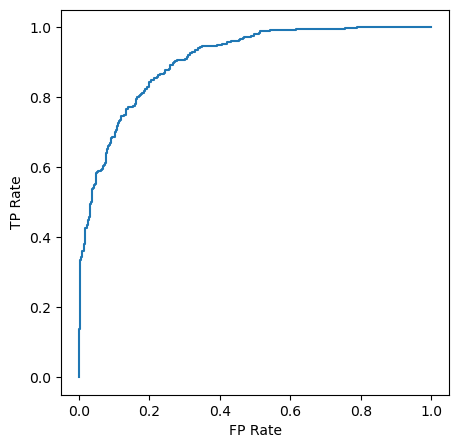

In [35]:
# STEP 4
# given the true labels of size (N,), the predicted probabilities of size (N,) and
# the thresholds of size (N + 1,), it should return the FP and TP rates of size (N + 1,)
def calculate_fp_and_tp_rates(true_labels, predicted_probabilities, thresholds):
    # your implementation starts below
    
    tp_rates = []  # True Positive Rates
    fp_rates = []  # False Positive Rates

    for threshold in thresholds:
        # Predicted classes - 1 if probability >= threshold, else 0
        predicted_classes = np.where(predicted_probabilities >= threshold, 1, -1)
        #print(predicted_classes)
        # True Positives, False Positives, True Negatives, False Negatives
        TP = np.sum((predicted_classes == 1) & (true_labels == 1))
        FP = np.sum((predicted_classes == 1) & (true_labels == -1))
        TN = np.sum((predicted_classes == -1) & (true_labels == -1))
        FN = np.sum((predicted_classes == -1) & (true_labels == 1))

        # Calculate TPR and FPR
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)

        tp_rates.append(TPR)
        fp_rates.append(FPR)

    # your implementation ends above
    return fp_rates, tp_rates

fp_rates, tp_rates = calculate_fp_and_tp_rates(true_labels, predicted_probabilities, thresholds)
print(fp_rates)
print(tp_rates)

fig = plt.figure(figsize = (5, 5))
plt.plot(fp_rates, tp_rates)
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.show()
fig.savefig("hw06_roc_curve.pdf", bbox_inches = "tight")


In [44]:
# STEP 5
# given the FP and TP rates of size (N + 1,),
# it should return the area under the ROC curve
def calculate_auroc(fp_rates, tp_rates):
    # your implementation starts below
    sorted_indices = np.argsort(fp_rates)
    sorted_fp = np.array(fp_rates)[sorted_indices]
    sorted_tp = np.array(tp_rates)[sorted_indices]

    auroc = 0.0

    sorted_fp = np.insert(sorted_fp, 0, 0)
    sorted_tp = np.insert(sorted_tp, 0, 0)

    if sorted_fp[-1] != 1 or sorted_tp[-1] != 1:
        sorted_fp = np.append(sorted_fp, 1)
        sorted_tp = np.append(sorted_tp, 1)

    for i in range(1, len(sorted_fp)):
        height = sorted_fp[i] - sorted_fp[i - 1]
        average_base = (sorted_tp[i] + sorted_tp[i - 1]) / 2
        auroc += average_base * height
       
    return auroc

auroc = calculate_auroc(fp_rates, tp_rates)
print("The area under the ROC curve is {}.".format(auroc))

The area under the ROC curve is 0.9063865196588298.
